# Table of contents
----
- [Prepare packages and data](#1)
- [About Tasks](#2)
- [Step 1. Data Chunking](#3)
- [Step 2. Chunk Embedding](#4)
- [Step 3. Vector DB](#5)
- [Step 4. Retrieval](#6)
- [Step 5. Evaluation](#7)
- [Step 6. Submisiion](#8)
- [Generation Task](#9)
---

<a id='1'></a>
# Prepare packages and data


In [ ]:
!pip install openai==1.55.3 --force-reinstall --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.0/457.0 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3

In [ ]:
!git clone https://github.com/linq-rag/FinanceRAG.git
!pip install datasets
!pip install gdown
!pip install chromadb
!pip install accelerate
!pip install pytrec_eval
!pip install rank_bm25
!pip install xformers

Cloning into 'FinanceRAG'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 57 (delta 2), reused 2 (delta 2), pack-reused 53 (from 1)
Receiving objects: 100% (57/57), 31.80 KiB | 2.65 MiB/s, done.
Resolving deltas: 100% (12/12), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

In [ ]:
cd FinanceRAG

/content/FinanceRAG


In [ ]:
# Data download
import gdown
gdown.download(f'https://drive.google.com/uc?id=1i774wMDNU1GI_jgHgYpWlY7lnsvbljDO', './gt.zip', quiet=False)
!unzip gt.zip -d /gt

Downloading...
From: https://drive.google.com/uc?id=1i774wMDNU1GI_jgHgYpWlY7lnsvbljDO
To: /content/FinanceRAG/gt.zip
100%|██████████| 15.1k/15.1k [00:00<00:00, 18.7MB/s]

Archive:  gt.zip
  inflating: /gt/TATQA_qrels.tsv     
  inflating: /gt/ConvFinQA_qrels.tsv  
  inflating: /gt/MultiHiertt_qrels.tsv  
  inflating: /gt/FinanceBench_qrels.tsv  
  inflating: /gt/FinDER_qrels.tsv    
  inflating: /gt/FinQABench_qrels.tsv  
  inflating: /gt/FinQA_qrels.tsv     


In [ ]:
# Import required libraries for document retrieval
import os
import torch
from financerag.tasks import FinDER, TATQA, FinQABench, FinanceBench, FinQA, ConvFinQA, MultiHiertt
from financerag.common import CrossEncoder, Encoder, Lexical, Retrieval
from rank_bm25 import BM25Okapi
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
import numpy as np
import chromadb
import pandas as pd

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

<a id='2'></a>
# About Tasks

As you know, the competition provides an integrated dataset of text and table-formatted financial information, designed to test the system's ability to retrieve and reason with financial data. Here is a brief description of seven datasets.


### Task Type: Passage Retrieval:
- FinDER: This task involves retrieving relevant sections from 10-K reports and financial disclosures based on search queries that mimic real questions posed by financial experts. It incorporates domain-specific terms and abbreviations.
- FinQABench: This benchmark tests the performance of AI models in answering queries about 10-K reports, evaluating their ability to detect misinformation and maintain factual accuracy.
- FinanceBench: This task involves using natural language queries to retrieve relevant information from publicly available documents, such as 10-K and annual reports, assessing how well systems handle realistic financial questions.


### Task Type: Tabular and Text Retrieval:
- TATQA: This task requires answering natural language queries that demand numerical reasoning based on data combined from tables and text in financial reports. It includes basic arithmetic, comparisons, and logical reasoning.
- FinQA: This challenge involves answering complex natural language queries in financial reports through multi-step numerical reasoning, requiring precise extraction and calculation from both text and table data.
- ConvFinQA: This task involves responding to queries through multiple conversational turns in financial reports, maintaining accurate context across turns to provide precise answers.
MultiHiertt: This task requires multi-step query resolution based on hierarchical tables and unstructured.

In [ ]:
finder_task = FinDER()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.13k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/858 [00:00<?, ?B/s]

corpus.jsonl.gz:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/13867 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/216 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/13867 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/216 [00:00<?, ? examples/s]

In [ ]:
# .corpus attribute contains the list of documents

document_list_finder = finder_task.corpus

print(f"Number of documents: {len(document_list_finder)}")
print(f"document 1: {document_list_finder[list(document_list_finder.keys())[0]]}")

# .queries attribute contains the list of queries

query_list_finder = finder_task.queries

print(f"Number of queries: {len(query_list_finder)}")
print(f"query 1: {query_list_finder[list(query_list_finder.keys())[0]]}")

Number of documents: 13863
document 1: {'title': 'ADBE OVERVIEW', 'text': 'Adobe is a global technology company with a mission to change the world through personalized digital experiences. For over four decades, Adobe’s innovations have transformed how individuals, teams, businesses, enterprises, institutions, and governments engage and interact across all types of media. Our products, services and solutions are used around the world to imagine, create, manage, deliver, measure, optimize and engage with content across surfaces and fuel digital experiences. We have a diverse user base that includes consumers, communicators, creative professionals, developers, students, small and medium businesses and enterprises. We are also empowering creators by putting the power of artificial intelligence (“AI”) in their hands, and doing so in ways we believe are responsible. Our products and services help unleash creativity, accelerate document productivity and power businesses in a digital world.'}

In financial data, it is common to encounter a mix of tables and text. These table data are often represented as text (strings) in Markdown format. So, how to effectively handle table data could be an important consideration.

# Data Preprocessing

Preprocess the document_list_finder dataset and filter out invalid documents, standardize them, etc.:

Remove documents where the text field is missing, empty, or null.
Handle Missing title:

If the title field is missing, assign an empty string or a placeholder.
Normalize the Fields:

Ensure that all documents have consistent keys (title and text).
Log or Count Skipped Documents:

Keep a log or count of how many documents are skipped due to missing text

In [ ]:
for doc_id, doc in document_list_finder.items():
    if 'text' not in doc or not doc['text'].strip():  # Check if 'text' is missing or empty
        print(f"Missing or empty 'text' in document ID {doc_id}: {doc}")


Missing or empty 'text' in document ID AAPL20231160: {'title': 'AAPL Apple Inc. | 2023 Form 10-K | 58', 'text': ''}
Missing or empty 'text' in document ID BRK.A20232704: {'title': 'BRK.A K-124', 'text': ''}
Missing or empty 'text' in document ID HD20231541: {'title': 'HD Fiscal 2023 Form 10-K 75', 'text': ''}
Missing or empty 'text' in document ID JPM20238558: {'title': 'JPM 322 JPMorgan Chase & Co./2023 Form 10-K', 'text': ''}
Missing or empty 'text' in document ID UNH20231739: {'title': 'UNH Rupert Bondy As Attorney-in-Fact', 'text': ''}


In [ ]:
# Preprocessing `document_list_finder` when it is a dictionary
cleaned_document_list_finder = {}
skipped_docs = 0

for doc_id, doc in document_list_finder.items():
    # Check if `text` exists and is non-empty
    if 'text' not in doc or not doc['text'].strip():
        skipped_docs += 1
        continue  # Skip this document

    # Handle missing `title` by assigning an empty string
    if 'title' not in doc or not doc['title'].strip():
        doc['title'] = ''

    # Add the cleaned document to the cleaned dataset
    cleaned_document_list_finder[doc_id] = doc

# Log the results
print(f"Total documents: {len(document_list_finder)}")
print(f"Valid documents after cleaning: {len(cleaned_document_list_finder)}")
print(f"Skipped documents: {skipped_docs}")


Total documents: 13863
Valid documents after cleaning: 13858
Skipped documents: 5


<a id='3'></a>
# Step 1. Data Chunking

In [ ]:
# Install NLTK punkt tokenizer if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def overlap_chunk_documents(documents, chunk_size=512, overlap_size=256):
    """
    Chunk documents with overlapping chunks for better context retention.

    Args:
        documents (dict): Dictionary of documents with `_id` and `text`.
        chunk_size (int): Size of each chunk in characters.
        overlap_size (int): Overlap size in characters between chunks.

    Returns:
        list: A list of overlapping chunks with unique IDs.
    """
    chunks = []
    for doc_id, doc in documents.items():
        text = doc['text']
        title = doc.get('title', '')

        for start in range(0, len(text), chunk_size):
            end = start + chunk_size
            # Include overlap context
            if start == 0:
                chunk_text = text[start:end + overlap_size]
            else:
                chunk_text = text[start - overlap_size:end + overlap_size]
            if len(chunk_text.strip()) > 0:
                chunks.append({
                    "_id": f"{doc_id}_{start}",
                    "title": title,
                    "text": chunk_text
                })
    return chunks

In [ ]:

# Apply overlap chunking to FinDER documents
chunk_size = 512
overlap_size = 256

finder_chunks_overlap = overlap_chunk_documents(cleaned_document_list_finder, chunk_size=chunk_size, overlap_size=overlap_size)

print(f"Number of overlapping chunks created: {len(finder_chunks_overlap)}")
print(f"Sample chunk 1: {finder_chunks_overlap[0]}")
print(f"Sample chunk 2: {finder_chunks_overlap[1]}")


Number of overlapping chunks created: 22572
Sample chunk 1: {'_id': 'ADBE20230004_0', 'title': 'ADBE OVERVIEW', 'text': 'Adobe is a global technology company with a mission to change the world through personalized digital experiences. For over four decades, Adobe’s innovations have transformed how individuals, teams, businesses, enterprises, institutions, and governments engage and interact across all types of media. Our products, services and solutions are used around the world to imagine, create, manage, deliver, measure, optimize and engage with content across surfaces and fuel digital experiences. We have a diverse user base that includes consumers, communicators, creative professionals, developers, students, small and medium businesses and enterprises. We are also empowering creators by putting the power of artificial intelligence (“AI”) in their hands, and doing so in wa'}
Sample chunk 2: {'_id': 'ADBE20230004_512', 'title': 'ADBE OVERVIEW', 'text': 'age and interact across all t

In competitions datasets, since the documents are already chunked in the data, there is no need to perform chunking again. However, re-chunking and applying post-processing (doc ID matching) later could be a good strategy for better retrieval performance.

we will introduce advanced methods this Thursday, so try other chunking methods yourself.



---



Some tokens in the Finder dataset have been discovered to be vry long as you can see below, and the model that we'll use (Stella) usually deals with max token size of 512, Therefore, we want to rechunk the docs

<a id='4'></a>
# Step 2. Chunk Embedding

For chunk embedding, it is necessary to aggregate token-level embeddings into a fixed-size vector to represent a document, sentence, or query. This process is known as "pooling". There are two commonly used pooling strategies:

- reference : https://blog.ml6.eu/the-art-of-pooling-embeddings-c56575114cf8

1. CLS Token Pooling:

- Utilizes the [CLS] token embedding (commonly used in transformer-based models like BERT) as the representation of the entire input.
- The [CLS] token is pretrained to summarize the input during the model's training phase.
- Provides a concise and often effective representation of the sequence, especially for tasks like retrieval.

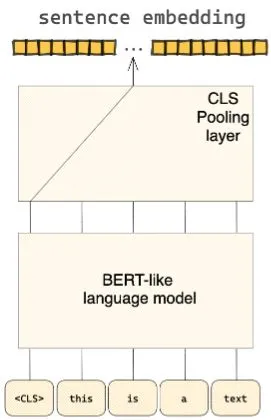

2. Mean Pooling:
- Aggregates embeddings by averaging the token-level vectors across all tokens.
- Simple and efficient, making it a widely used choice.
- Works well when all tokens contribute equally to the semantic meaning of the input.

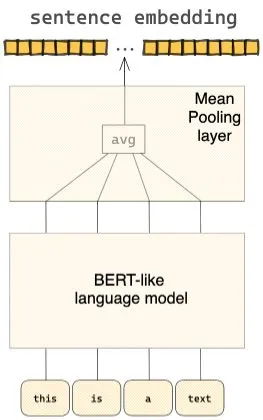

As discussed in the class, there are benchmarks available for text embedding models; however, due to the limitations of Google Colab, only lightweight models can be used. In the context of finance, where tables and structured data are often present, it is essential to consider various embedding models to handle these diverse data formats effectively.

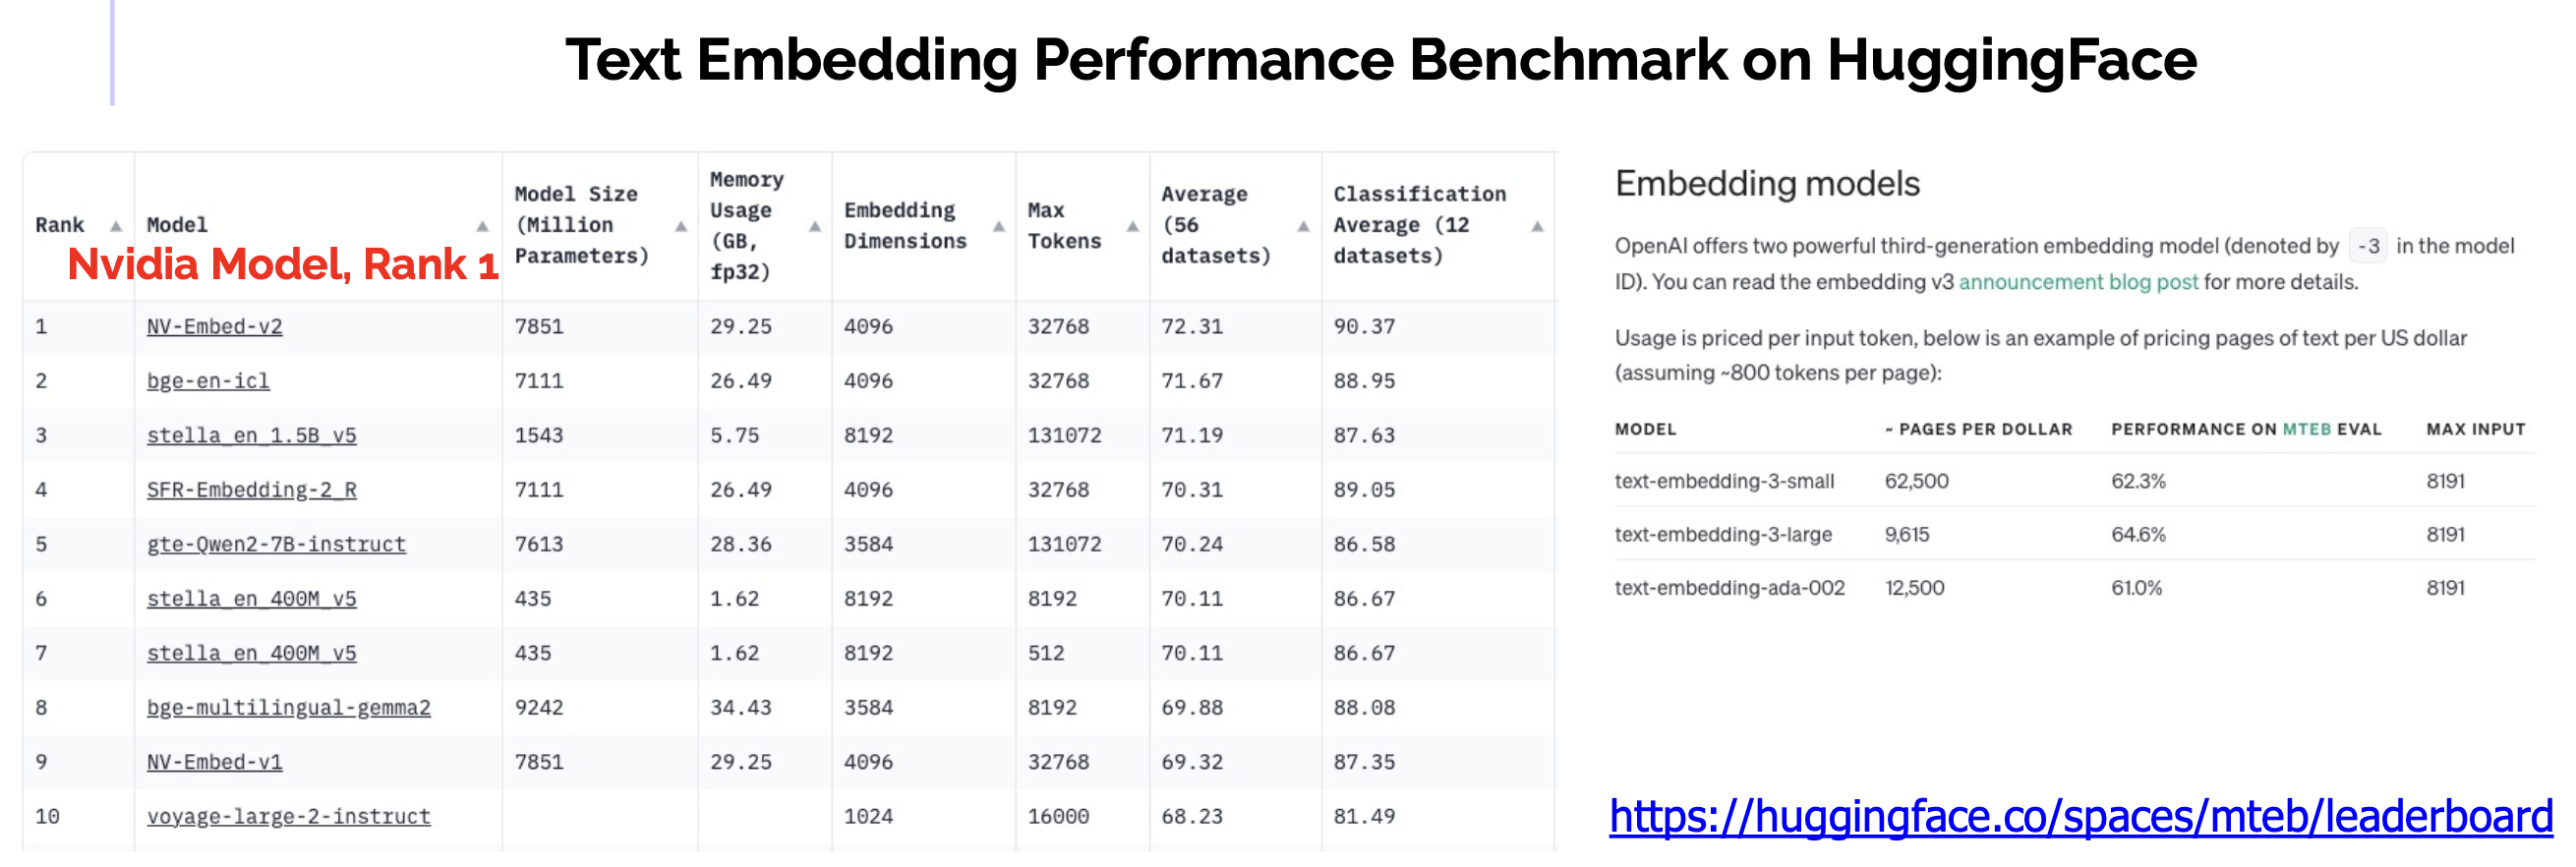

In [ ]:

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Utill functions for dense retrieval
##################################################################################
def cos_sim(a, b):
    a = _ensure_tensor(a)
    b = _ensure_tensor(b)
    return torch.mm(
        torch.nn.functional.normalize(a, p=2, dim=1),
        torch.nn.functional.normalize(b, p=2, dim=1).transpose(0, 1),
    )

@torch.no_grad()
def dot_score(a, b):
    a = _ensure_tensor(a)
    b = _ensure_tensor(b)
    return torch.mm(a, b.transpose(0, 1))

def _ensure_tensor(x):
    if not isinstance(x, torch.Tensor):
        x = torch.tensor(x, device=device)
    if len(x.shape) == 1:
        x = x.unsqueeze(0)
    return x


# Mean pooling
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

##################################################################################

class TransformerEncoder(Encoder):
    def __init__(self, model_name_or_path, query_prompt=None, doc_prompt=None, **kwargs):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=True)
        self.encoder = AutoModel.from_pretrained(model_name_or_path, trust_remote_code=True).to(device)  # Load model to GPU
        self.query_prompt = query_prompt
        self.doc_prompt = doc_prompt

    def encode(self, texts, batch_size=8, use_mean_pooling=True):
        embeddings = []
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]
            inputs = self.tokenizer(
                batch_texts,
                return_tensors="pt",
                truncation=True,
                padding=True
            ).to(device)  # Move inputs to GPU
            with torch.no_grad():
                outputs = self.encoder(**inputs)
            if use_mean_pooling:
                # Apply mean pooling
                pooled_embeddings = mean_pooling(outputs, inputs['attention_mask'])
                embeddings.append(pooled_embeddings)
            else:
                # Use the [CLS] token's output for embeddings (first token representation)
                cls_embeddings = outputs.last_hidden_state[:, 0, :]
                embeddings.append(cls_embeddings)
        return torch.cat(embeddings, dim=0).cpu()  # Move back to CPU if needed

    def encode_queries(self, queries, batch_size=8, use_mean_pooling=True, **kwargs):
        if self.query_prompt is not None:
            queries = [self.query_prompt + query for query in queries]
        return self.encode(queries, batch_size=batch_size, use_mean_pooling=use_mean_pooling, **kwargs)

    def encode_corpus(self, corpus, batch_size=8, use_mean_pooling=True, **kwargs):
        if isinstance(corpus, dict):
            sentences = [
                (
                    (corpus["title"][i] + " " + corpus["text"][i]).strip()
                    if "title" in corpus
                    else corpus["text"][i].strip()
                )
                for i in range(len(corpus["text"]))
            ]
        else:
            sentences = [
                (
                    (doc["title"] + " " + doc["text"]).strip()
                    if "title" in doc
                    else doc["text"].strip()
                )
                for doc in corpus
            ]
        if self.doc_prompt is not None:
            sentences = [self.doc_prompt + s for s in sentences]
        return self.encode(sentences, batch_size=batch_size, use_mean_pooling=use_mean_pooling, **kwargs)


In [ ]:
from transformers import AutoTokenizer, AutoModel

# Initialize the encoder
encoder = TransformerEncoder(
    model_name_or_path="dunzhang/stella_en_400M_v5",
    query_prompt=None,
    doc_prompt=None
)

print("TransformerEncoder initialized with model: dunzhang/stella_en_400M_v5")


tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_400M_v5:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_400M_v5:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TransformerEncoder initialized with model: dunzhang/stella_en_400M_v5


In [ ]:
# Prepare query texts
query_texts = list(query_list_finder.values())  # Extract all query texts directly

# Load Embeddings After Reconnecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Load files from Google Drive
import numpy as np
# query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/finder_query_embeddings.npy")
finder_corpus_embeddings = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/finder_corpus_embeddings.npy")

# print("Query Embeddings Loaded:", query_embeddings_loaded.shape)
print("Corpus Embeddings Loaded:", finder_corpus_embeddings.shape)


Mounted at /content/drive/
Corpus Embeddings Loaded: (22572, 1024)


<a id='5'></a>
# Step 3. Query Expansion



---



---




In [ ]:

import json
import logging
import os
from typing import Any, Callable, Dict, List, Literal, Optional, Tuple
import nest_asyncio
nest_asyncio.apply()

logging.getLogger("openai").setLevel(logging.ERROR)
logging.getLogger("httpx").setLevel(logging.ERROR)


OPENAI_API_KEY = ""
logger = logging.getLogger(__name__)
if not logger.handlers:
    logger.setLevel(logging.INFO)
    console_handler = logging.StreamHandler()
    formatter = logging.Formatter('%(name)s - %(levelname)s - %(asctime)s - %(message)s')
    console_handler.setFormatter(formatter)
    logger.addHandler(console_handler)
    logger.propagate = False


In [ ]:
import os
from getpass import getpass

if "OPENAI_API_KEY" in os.environ:
  os.environ['OPENAI_API_KEY'] = getpass("Your OpenAI API Key: ")

In [ ]:
print(len(query_list_finder))

216


In [ ]:
import logging
from typing import Dict
from openai import OpenAI
import os
import json
from google.colab import drive


def setup_logging():
    """
    Sets up logging for the application.
    """
    logger = logging.getLogger(__name__)
    if not logger.handlers:
        logger.setLevel(logging.INFO)
        console_handler = logging.StreamHandler()
        formatter = logging.Formatter('%(name)s - %(levelname)s - %(asctime)s - %(message)s')
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)
        logger.propagate = False
    return logger

logger = setup_logging()


class QueryRewriter:
    def __init__(self, api_key: str):
        """
        Initializes the QueryRewriter with an explicit OpenAI client.

        Args:
            api_key (str): The OpenAI API key.
        """
        self.client = OpenAI(api_key=api_key)

    def rewrite_queries(self, queries: Dict[str, str]) -> Dict[str, str]:
        """
        Rewrites the queries to make them more specific and detailed.

        Args:
            queries (dict): A dictionary of queries (e.g., {"q1": "query text"}).

        Returns:
            dict: A dictionary with rewritten, more specific queries.
        """
        rewritten_queries = {}
        for qid, query in queries.items():
            try:
                # Use ChatGPT to rewrite the query
                response = self.client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {
                            "role": "system",
                            "content": (
                                "Rewrite the given query to make it more specific and detailed. "
                                "Include additional context, relevant terms, and precise details "
                                "to broaden its scope while maintaining the original intent."
                            ),
                        },
                        {"role": "user", "content": f"Rewrite this query: {query}"},
                    ],
                    max_tokens=256
                )

                # Extract the rewritten query
                rewritten_query = response.choices[0].message.content.strip()
                rewritten_queries[qid] = rewritten_query

            except Exception as e:
                print(f"Error rewriting query '{query}': {e}")
                rewritten_queries[qid] = query  # Fallback to the original query

        return rewritten_queries


# Main Code
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries = query_rewriter.rewrite_queries(query_list_finder)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries.items():
        print(f"{qid}: {rewritten_query}")

    # Save rewritten queries to a JSON file
    #rewritten_queries_file = "/content/drive/My Drive/rewritten_queries.json"
    #with open(rewritten_queries_file, "w", encoding="utf-8") as file:
       # json.dump(rewritten_queries, file, indent=4, ensure_ascii=False)
    #print(f"Rewritten queries saved to {rewritten_queries_file}")

Rewritten Queries:
q00001: What specific software, hardware, cloud services, and other technology solutions does Microsoft offer as part of its diverse portfolio of products and services?
q00002: Can you provide a detailed breakdown of the segments within Microsoft Corporation (MSFT), including information on the various business divisions, such as productivity and business processes, intelligent cloud, and more?
q00003: Could you please provide a list of industries or sectors that Microsoft's key customers belong to?
q00004: Can you elaborate on the specifics of Microsoft's business model, including their revenue streams, key products and services, target markets, competitive strategies, and partnerships in the technology industry?
q00005: Please provide information regarding Microsoft's capital expenditure (Capex) commitments, including the amount, timeframe, and purpose of the investments.
q00006: Can you provide me with a list of Microsoft's mergers and acquisitions that have taken

In [ ]:
import json

# Save expanded queries to a JSON file
def save_expanded_queries_to_file(expanded_queries, file_path):
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(expanded_queries, file, indent=4, ensure_ascii=False)
    print(f"Expanded queries saved to {file_path}")

# Example usage
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries.json"
save_expanded_queries_to_file(rewritten_queries, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries.json


In [ ]:
print("Original Queries:")
for qid, query in query_list_finder.items():
    print(f"{qid}: {query}")

Original Queries:
q00001: What are the service and product offerings from Microsoft
q00002: MSFT segment breakdown
q00003: Who are Microsoft`s key customers?
q00004: What is Microsoft`s business model
q00005: MSFT Capex commitment
q00006: Which recent M&A activities has Microsoft been involved in
q00007: How much revenue does Microsoft generate from contracts with customers?
q00008: MSFT remaining performance obligation
q00009: Adobe subsidiaries of trademarks
q00010: ADBE share repurchase
q00011: fully diluted shares outstanding ADBE
q00012: Who are the members of Adobe`s management team
q00013: ADBE RPO
q00014: ADBE KPI
q00015: How are Coupang`s KPIs?"
q00016: Coupang segment margin
q00017: CPNG capital expenditure
q00018: CPNG any recent M&A activities
q00019: When did Coupang`s Farfetch consolidation start
q00020: What is FLC, and how is its revenue recognized by Coupang
q00021: When did new FLC contract begin CPNG
q00022: CPNG free cash flow
q00023: Class of Shares CPNG
q00024: an

In [ ]:
# Encode rewritten queries
finder_query_embeddings = encoder.encode_queries(list(rewritten_queries.values()), batch_size=8)
print(f"Encoded {len(finder_query_embeddings)} queries.")

Encoded 216 queries.


In [ ]:
np.save("finder_query_embeddings.npy", finder_query_embeddings)
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/finder_query_embeddings.npy", finder_query_embeddings)

In [ ]:
#Load embeddings

from google.colab import drive
drive.mount('/content/drive')

# Load files from Google Drive
import numpy as np
finder_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/finder_query_embeddings.npy")
finder_corpus_embeddings = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/finder_corpus_embeddings.npy")

print("Finder Query Embeddings Loaded:", finder_query_embeddings_loaded.shape)
print("Finder Corpus Embeddings Loaded:", finder_corpus_embeddings.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Finder Query Embeddings Loaded: (216, 1024)
Finder Corpus Embeddings Loaded: (22572, 1024)


<a id='6'></a>
# Step 4. Retrieval

In [ ]:
import torch
import numpy as np
import random

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)


In [ ]:
from typing import Dict, Callable, Optional, List
import torch


class DenseRetrieval:
    def __init__(self, model, batch_size=64, score_functions=None, corpus_chunk_size=50000):
        self.model = model
        self.batch_size = batch_size
        self.score_functions = score_functions or {"cos_sim": cos_sim, "dot": dot_score}
        self.corpus_chunk_size = corpus_chunk_size
        self.results = {}

    def retrieve(self,
                 query_embeddings,
                 corpus_embeddings,
                 queries,
                 corpus,
                 top_k=10,
                 initial_k=None,  # Dynamically scale initial_k
                 score_function="cos_sim",
                 return_sorted=False):
        """
        Retrieve the top-k most similar documents for each query, with extra results for normalization.
        """
        if score_function not in self.score_functions:
            raise ValueError("Invalid score function. Choose 'cos_sim' or 'dot'.")

        # Dynamically scale initial_k to 5 × top_k if not provided
        initial_k = initial_k or top_k * 5

        # Compute similarity scores
        cos_scores = self.score_functions[score_function](query_embeddings, corpus_embeddings)
        cos_scores[torch.isnan(cos_scores)] = -1  # Handle NaNs

        # Retrieve initial_k scores and indices
        actual_initial_k = min(initial_k, cos_scores.size(1))
        if actual_initial_k < initial_k:
            print(f"Note: initial_k reduced to {actual_initial_k} due to corpus size.")

        cos_scores_initial_values, cos_scores_initial_idx = torch.topk(
            cos_scores, k=actual_initial_k, dim=1, largest=True, sorted=return_sorted
        )

        # Convert to CPU lists for further processing
        cos_scores_initial_values = cos_scores_initial_values.cpu().tolist()
        cos_scores_initial_idx = cos_scores_initial_idx.cpu().tolist()

        # Map results to queries
        query_ids = list(queries.keys())
        corpus_ids = list(corpus.keys())
        initial_results = {
            query_id: {
                corpus_ids[sub_corpus_id]: score
                for sub_corpus_id, score in zip(
                    cos_scores_initial_idx[query_itr], cos_scores_initial_values[query_itr]
                )
            }
            for query_itr, query_id in enumerate(query_ids)
        }

        # Normalize and ensure top_k results
        normalized_results = {}
        for query_id, docs in initial_results.items():
            normalized_docs = {}
            for doc_id, score in docs.items():
                normalized_id = doc_id.split('_')[0] if '_' in doc_id else doc_id
                if normalized_id not in normalized_docs or score > normalized_docs[normalized_id]:
                    normalized_docs[normalized_id] = score

            # Add remaining documents to reach exactly top_k
            if len(normalized_docs) < top_k:
                remaining_docs = {
                    doc_id: score for doc_id, score in docs.items()
                    if doc_id.split('_')[0] not in normalized_docs
                }
                sorted_remaining_docs = sorted(remaining_docs.items(), key=lambda x: x[1], reverse=True)
                for doc_id, score in sorted_remaining_docs[:top_k - len(normalized_docs)]:
                    normalized_docs[doc_id.split('_')[0]] = score

            # Pad with dummy results if still short
            while len(normalized_docs) < top_k:
                normalized_docs[f"DUMMY_{len(normalized_docs)}"] = 0.0

            # Ensure exactly top_k results, sorted by score
            normalized_results[query_id] = {
                k: v for k, v in sorted(normalized_docs.items(), key=lambda x: x[1], reverse=True)[:top_k]
            }

        return normalized_results


In [ ]:
# Initialize Dense Retrieval
dense_retrieval = DenseRetrieval(model=encoder)

# Prepare queries and corpus in dictionary format (as before)
queries = {qid: query for qid, query in query_list_finder.items()}  # Query dictionary
corpus = {chunk["_id"]: chunk for chunk in finder_chunks_overlap}  # Corpus dictionary

# Initialize DenseRetrieval class
dense_retrieval = DenseRetrieval(model=encoder)  # Encoder can remain the same for consistency

# Perform retrieval using precomputed embeddings
top_k = 10  # Retrieve top 10 documents
retrieval_results_finder = dense_retrieval.retrieve(
    query_embeddings=finder_query_embeddings_loaded,
    corpus_embeddings=finder_corpus_embeddings,
    queries=queries,
    corpus=corpus,
    top_k=top_k,
    score_function="cos_sim"  # You can switch to "dot" if preferred
)

# Display results for a sample query
sample_query_id = list(retrieval_results_finder.keys())[11]
print(f"Top-{top_k} results for Query {sample_query_id}:")
for corpus_id, score in retrieval_results_finder[sample_query_id].items():
    print(f"Corpus ID: {corpus_id}, Score: {score:.4f}")

Top-10 results for Query q00012:
Corpus ID: ADBE20230283, Score: 0.8361
Corpus ID: MSFT20230274, Score: 0.7340
Corpus ID: PG20230142, Score: 0.7187
Corpus ID: ADBE20230497, Score: 0.7176
Corpus ID: ADBE20230222, Score: 0.7132
Corpus ID: NVDA20230137, Score: 0.7106
Corpus ID: AMZN20230041, Score: 0.7095
Corpus ID: ADBE20230961, Score: 0.7081
Corpus ID: ADBE20230017, Score: 0.7053
Corpus ID: ADBE20231061, Score: 0.7043


In [ ]:
for query_id, docs in retrieval_results_finder.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


In [ ]:
# Print a sample of adjusted retrieval_results
print("Sample  Results:")
for query_id, docs in list(retrieval_results_finder.items())[:10]:
    print(f"Query ID: {query_id}")
    print(f"Retrieved Docs: {list(docs.keys())[:10]}")  # Show first 5 document IDs
    print()


Sample  Results:
Query ID: q00001
Retrieved Docs: ['MSFT20230016', 'MSFT20230015', 'MSFT20230966', 'MSFT20230963', 'MSFT20230216', 'MSFT20230152', 'MSFT20230148', 'MSFT20231720', 'MSFT20231728', 'MSFT20230150']

Query ID: q00002
Retrieved Docs: ['MSFT20230120', 'MSFT20230501', 'MSFT20230521', 'MSFT20230128', 'MSFT20231716', 'MSFT20230566', 'MSFT20230122', 'MSFT20231720', 'MSFT20230148', 'MSFT20230216']

Query ID: q00003
Retrieved Docs: ['MSFT20230264', 'MSFT20230486', 'MSFT20230507', 'MSFT20231766', 'MSFT20230521', 'MSFT20230216', 'MSFT20230122', 'MSFT20230975', 'MSFT20230148', 'MSFT20231720']

Query ID: q00004
Retrieved Docs: ['MSFT20230319', 'MSFT20230317', 'MSFT20230327', 'MSFT20230164', 'MSFT20230318', 'MSFT20230216', 'MSFT20230963', 'MSFT20230311', 'MSFT20230486', 'MSFT20230328']

Query ID: q00005
Retrieved Docs: ['MSFT20230723', 'MSFT20231297', 'MSFT20230673', 'MSFT20230675', 'MSFT20230608', 'MSFT20230549', 'MSFT20230331', 'MSFT20230707', 'MSFT20230716', 'MSFT20231156']

Query ID

<a id='7'></a>
# Step 5: Evaluation

In [ ]:
import pandas as pd

# Load the ground truth data
ground_truth_path = "/gt/FinDER_qrels.tsv"
df = pd.read_csv(ground_truth_path, sep="\t")

# Convert the TSV data into a dictionary format for evaluation
qrels_dict = df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


# Evaluate the model and get all metrics
evaluation_output = finder_task.evaluate(qrels_dict, retrieval_results_finder, [1, 5, 10])

evaluation_output



<ipython-input-22-06d73510c508>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  qrels_dict = df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.28125, 'NDCG@5': 0.42841, 'NDCG@10': 0.47898},
 {'MAP@1': 0.22396, 'MAP@5': 0.37305, 'MAP@10': 0.39495},
 {'Recall@1': 0.22396, 'Recall@5': 0.5375, 'Recall@10': 0.67344},
 {'P@1': 0.28125, 'P@5': 0.15, 'P@10': 0.1})

After retrieving on the entire data, you can evaluate performance using the functions and test data (ground truth) available in financerag. Simply load the downloaded test data and perform evaluations to do this easily. For Task 1, performance evaluation can be done using NDCG@k.

# Evaluation on all other datasets:

# TATQA

In [ ]:
# Initialize dataset
tatqa_task = TATQA()

# Access corpus and queries
tatqa_corpus = tatqa_task.corpus
tatqa_queries = tatqa_task.queries

print(f"Number of queries: {len(tatqa_queries)}")
print(f"Number of corpus: {len(tatqa_corpus)}")

# Clean corpus
cleaned_tatqa_corpus = {
    doc_id: doc for doc_id, doc in tatqa_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents number in the corpus: {len(cleaned_tatqa_corpus)}")


corpus.jsonl.gz:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/2756 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/1663 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2756 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1663 [00:00<?, ? examples/s]

Number of queries: 1663
Number of corpus: 2756
Valid documents number in the corpus: 2756


In [ ]:
# Chunk documents
tatqa_chunks = overlap_chunk_documents(cleaned_tatqa_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(tatqa_chunks)}")

Number of chunks: 14240


In [ ]:
print("Original Queries:")
for qid, query in tatqa_queries.items():
    print(f"{qid}: {query}")

Original Queries:
q1a73c1d4: In which year was interest income greater than 7,000 thousands?
q1a72ef98: What was the Net Income (Loss) in 2019?
q1a716380: What was the percentage of Plan Assets for Other assets in 2019?
q1a73f97e: What was the service revenue from Americas in 2019?
q1a731ee6: What was the Customer support renewal rate for the quarter ended June 30, 2019?
q1a729624: What is the change in Loans due from subsidiaries - current portion from 2018 to 2019?
q1a732468: What is the change in Add: Voyage expenses from Years Ended December 31, 2018 to 2019?
q1a73f24e: What is the change in Depreciation and amortization between 2018 and 2019?
q1a714760: What was the percentage change in total pretax income between 2018 and 2019?
q1a72d620: What are the respective maintenance revenue in 2018 and 2019?
q1a716fa6: What was the percentage change in adjusted EBITDA between 2018 and 2019?
q1a729854: What are the other costs associated with the closure of the Overland Park office apart f

Query expansion:

In [ ]:
# Main Code
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_tatqa = query_rewriter.rewrite_queries(tatqa_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_tatqa.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
q1a73c1d4: Can you provide me with a list of the years in which interest income exceeded $7,000,000?
q1a72ef98: What was the exact figure for the Net Income or Loss recorded on the Income Statement for the fiscal year 2019?
q1a716380: What specific percentage of Plan Assets in the financial year 2019 were allocated to "Other assets," which are defined as assets not falling under traditional categories such as equities, bonds, or cash equivalents in a financial portfolio or retirement plan?
q1a73f97e: How much service revenue did the Americas region generate specifically in the year 2019? Include a breakdown of the total service revenue from countries in the Americas region for a comprehensive analysis of the financial performance.
q1a731ee6: What was the percentage of customers who renewed their customer support contracts for the quarter ending June 30, 2019?
q1a729624: What is the specific financial difference in the current portion of Loans due from subsidiaries be

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_tatqa.json"
save_expanded_queries_to_file(rewritten_queries_tatqa, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_tatqa.json


In [ ]:
# Generate embeddings
tatqa_query_embeddings = encoder.encode_queries(list(rewritten_queries_tatqa.values()), batch_size=8)
print(f"Encoded {len(tatqa_query_embeddings)} query chunks.")

Encoded 1663 query chunks.


In [ ]:
# tatqa_corpus_embeddings = encoder.encode_corpus(tatqa_chunks, batch_size=8)
# print(f"Encoded {len(tatqa_corpus_embeddings)} corpus chunks.")

Encoded 14240 corpus chunks.


In [ ]:
# Save embeddings
np.save("tatqa_query_embeddings.npy", tatqa_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/tatqa_query_embeddings.npy", tatqa_query_embeddings)

print("TATQA embeddings saved.")

TATQA embeddings saved.


In [ ]:
#Load embeddings

import numpy as np
tatqa_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/tatqa_query_embeddings.npy")
tatqa_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/tatqa_corpus_embeddings.npy")

print("TATQA Query Embeddings Loaded:", tatqa_query_embeddings_loaded.shape)
print("TATQA Corpus Embeddings Loaded:", tatqa_corpus_embeddings_loaded.shape)

TATQA Query Embeddings Loaded: (1663, 1024)
TATQA Corpus Embeddings Loaded: (14240, 1024)


In [ ]:
assert len(tatqa_query_embeddings_loaded) == len(tatqa_queries), "Mismatch between query embeddings and queries."
assert len(tatqa_corpus_embeddings_loaded) == len(tatqa_chunks), "Mismatch between corpus embeddings and corpus."

In [ ]:
# Retrieval Step
retrieval_results_tatqa = dense_retrieval.retrieve(
    query_embeddings=tatqa_query_embeddings_loaded,
    corpus_embeddings=tatqa_corpus_embeddings_loaded,
    queries=tatqa_queries,
    corpus={chunk["_id"]: chunk for chunk in tatqa_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
tatqa_ground_truth_path = "/gt/TATQA_qrels.tsv"
tatqa_df = pd.read_csv(tatqa_ground_truth_path, sep="\t")
tatqa_qrels = tatqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

tatqa_results = tatqa_task.evaluate(tatqa_qrels, retrieval_results_tatqa, [1, 5, 10])
print("Evaluation Results for TATQA:")
tatqa_results

Evaluation Results for TATQA:


<ipython-input-27-866dee228205>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tatqa_qrels = tatqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.24096, 'NDCG@5': 0.35463, 'NDCG@10': 0.38412},
 {'MAP@1': 0.24096, 'MAP@5': 0.32098, 'MAP@10': 0.33295},
 {'Recall@1': 0.24096, 'Recall@5': 0.45582, 'Recall@10': 0.54819},
 {'P@1': 0.24096, 'P@5': 0.09116, 'P@10': 0.05482})

In [ ]:
for query_id, docs in retrieval_results_tatqa.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


In [ ]:
for query_id, docs in retrieval_results_tatqa.items():
    if len(docs) != 10:
        print(f"Query {query_id} has {len(docs)} documents instead of 10.")


In [ ]:
# Print a sample of adjusted retrieval_results
print("Sample  Results:")
for query_id, docs in list(retrieval_results_tatqa.items())[:10]:
    print(f"Query ID: {query_id}")
    print(f"Retrieved Docs: {list(docs.keys())[:10]}")  # Show first 5 document IDs
    print()


Sample  Results:
Query ID: q1a73c1d4
Retrieved Docs: ['d1b3a734c', 'd1b37721e', 'd1b31dd7c', 'd1b3be84e', 'd1b323f38', 'd1b3c11c0', 'd1b38bf5c', 'd1b371530', 'd1b396b78', 'd1b2e63f4']

Query ID: q1a72ef98
Retrieved Docs: ['d1b34a228', 'd1b39336a', 'd1b3be6fa', 'd1b39c942', 'd1b3ac770', 'd1b3952fa', 'd1b3495da', 'd1b34fe9e', 'd1b38eba8', 'd1b35b8b6']

Query ID: q1a716380
Retrieved Docs: ['d1b36001e', 'd1b341b5a', 'd1b30240a', 'd1b31ad02', 'd1a716452', 'd1b304548', 'd1b36f398', 'd1b35a9fc', 'd1b39a5ac', 'd1b31925e']

Query ID: q1a73f97e
Retrieved Docs: ['d1b3a7ef0', 'd1b35a6c8', 'd1a73fa6e', 'd1b313dcc', 'd1a71dd10', 'd1b369a38', 'd1b36a6ae', 'd1b3b96f0', 'd1b3a79e6', 'd1a72e1ec']

Query ID: q1a731ee6
Retrieved Docs: ['d1a731ff4', 'd1b35a6c8', 'd1b3115b8', 'd1b37f428', 'd1b37dcae', 'd1b35133e', 'd1b3bccba', 'd1a73fa6e', 'd1b31d46c', 'd1b2e2d26']

Query ID: q1a729624
Retrieved Docs: ['d1a7296ba', 'd1b3a734c', 'd1b310168', 'd1b3136e2', 'd1b359e3a', 'd1b2f066a', 'd1b3b1ebe', 'd1b2e585a', 'd


# FinQABench

In [ ]:
# Initialize dataset
finqabench_task = FinQABench()

# Access corpus and queries
finqabench_corpus = finqabench_task.corpus
finqabench_queries = finqabench_task.queries

print(f"Number of queries: {len(finqabench_queries)}")
print(f"Number of corpus: {len(finqabench_corpus)}")

# Clean corpus
cleaned_finqabench_corpus = {
    doc_id: doc for doc_id, doc in finqabench_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents number in the corpus: {len(cleaned_finqabench_corpus)}")


corpus.jsonl.gz:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/4.25k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/92 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/100 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/92 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/100 [00:00<?, ? examples/s]

Number of queries: 100
Number of corpus: 92
Valid documents number in the corpus: 92


In [ ]:
# Chunk documents
finqabench_chunks = overlap_chunk_documents(cleaned_finqabench_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(finqabench_chunks)}")

Number of chunks: 355


In [ ]:
print("Original Queries:")
for qid, query in finqabench_queries.items():
    print(f"{qid}: {query}")

Original Queries:
q4aa0b116: What is the redemption price for the 0.875% 2025 Notes and the 1.375% 2029 Notes if they are redeemed prior to the applicable Par Call Date?
q4aa0a48c: What is the maturity date of the 0.875% 2025 Notes issued by Apple Inc.?
q4aa0aeb4: What are the conditions under which the Company is not required to make any payment for any Tax imposed by any government or a political subdivision or taxing authority of or in any government or political subdivision?
q4aa05fa4: What is the Company's investment policy and strategy focused on?
q4aa092f8: What is the purpose of the Company's internal control over financial reporting?
q4aa06580: What was the net income for Apple Inc. in 2020?
q4aa06cf6: What is the Company's fiscal year and how does it align with calendar quarters?
q4aa0090a: What risks may the COVID-19 pandemic pose to the Company's operational and financial performance?
q4aa07d2c: What is the total net deferred tax assets as of September 24, 2022?
q4aa09e9c: 

In [ ]:
# query expansion
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_finqabench = query_rewriter.rewrite_queries(finqabench_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_finqabench.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
q4aa0b116: What is the specific redemption price calculation for the 0.875% 2025 Notes and the 1.375% 2029 Notes if they are redeemed before reaching the Par Call Date? Please provide detailed information on the redemption terms and any applicable conditions related to early redemption for these two types of notes.
q4aa0a48c: Could you provide the maturity date of the 0.875% 2025 Notes issued by Apple Inc., as well as any associated terms and conditions relevant to the bond issuance such as interest payment frequency, call provisions, and any other important features of the bond structure?
q4aa0aeb4: Under what circumstances does the Company have legal exemption from making tax payments to any government, its political subdivisions, or taxing authorities, as stipulated in the applicable laws or contracts?
q4aa05fa4: Can you provide insights into the Company's investment policy and strategy, specifically detailing the sectors or markets in which the company typically 

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_finqabench.json"
save_expanded_queries_to_file(rewritten_queries_finqabench, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_finqabench.json


In [ ]:
# Generate embeddings
finqabench_query_embeddings = encoder.encode_queries(list(rewritten_queries_finqabench.values()), batch_size=8)
print(f"Encoded {len(finqabench_query_embeddings)} query chunks.")

# finqabench_corpus_embeddings = encoder.encode_corpus(finqabench_chunks, batch_size=8)
# print(f"Encoded {len(finqabench_corpus_embeddings)} corpus chunks.")

Encoded 100 query chunks.


In [ ]:
# Save embeddings
np.save("finqabench_query_embeddings.npy", finqabench_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/finqabench_query_embeddings.npy", finqabench_query_embeddings)

print("FinQABench embeddings saved.")

FinQABench embeddings saved.


Regenerating embeddings for query list that doesnt use query expansion:

In [ ]:
finqabench_query_embeddings = encoder.encode_queries(list(finqabench_queries.values()), batch_size=8)

In [ ]:
#Load embeddings

# Load files from Google Drive
import numpy as np
finqabench_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/finqabench_query_embeddings.npy")
finqabench_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/finqabench_corpus_embeddings.npy")

print("FinQABench Query Embeddings Loaded:", finqabench_query_embeddings_loaded.shape)
print("FinQABench Corpus Embeddings Loaded:", finqabench_corpus_embeddings_loaded.shape)


FinQABench Query Embeddings Loaded: (100, 1024)
FinQABench Corpus Embeddings Loaded: (355, 1024)


In [ ]:
# Retrieval Step
retrieval_results_finqabench = dense_retrieval.retrieve(
    query_embeddings=finqabench_query_embeddings_loaded,
    corpus_embeddings=finqabench_corpus_embeddings_loaded,
    queries=finqabench_queries,
    corpus={chunk["_id"]: chunk for chunk in finqabench_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
finqabench_ground_truth_path = "/gt/FinQABench_qrels.tsv"
finqabench_df = pd.read_csv(finqabench_ground_truth_path, sep="\t")
finqabench_qrels = finqabench_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

finqabench_results = finqabench_task.evaluate(finqabench_qrels, retrieval_results_finqabench, [1, 5, 10])
print("Evaluation Results for FinQABench:")
finqabench_results

Evaluation Results for FinQABench:


<ipython-input-35-1e8d6adba972>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  finqabench_qrels = finqabench_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.9, 'NDCG@5': 0.93333, 'NDCG@10': 0.93333},
 {'MAP@1': 0.9, 'MAP@5': 0.92222, 'MAP@10': 0.92222},
 {'Recall@1': 0.9, 'Recall@5': 0.96667, 'Recall@10': 0.96667},
 {'P@1': 0.9, 'P@5': 0.19333, 'P@10': 0.09667})

In [ ]:
for query_id, docs in retrieval_results_finqabench.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


# FinanceBench

In [ ]:
# Initialize dataset
financebench_task = FinanceBench()

# Access corpus and queries
financebench_corpus = financebench_task.corpus
financebench_queries = financebench_task.queries

print(f"Number of queries: {len(financebench_queries)}")
print(f"Number of corpus: {len(financebench_corpus)}")

# Clean corpus
cleaned_financebench_corpus = {
    doc_id: doc for doc_id, doc in financebench_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents: {len(cleaned_financebench_corpus)}")

corpus.jsonl.gz:   0%|          | 0.00/79.4k [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/180 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/150 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/180 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/150 [00:00<?, ? examples/s]

Number of queries: 150
Number of corpus: 180
Valid documents: 180


In [ ]:
# Chunk documents
financebench_chunks = overlap_chunk_documents(cleaned_financebench_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(financebench_chunks)}")

Number of chunks: 573


In [ ]:
print("Original Queries:")
for qid, query in financebench_queries.items():
    print(f"{qid}: {query}")

Original Queries:
qd2ac917a: What is the FY2019 - FY2020 total revenue growth rate for Block (formerly known as Square)? Answer in units of percents and round to one decimal place. Approach the question asked by assuming the standpoint of an investment banking analyst who only has access to the statement of income.
qd2aeff00: Does Paypal have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.
qd2acfe6c: How does Boeing's effective tax rate in FY2022 compare to FY2021?
qd2ad28d8: Using only the information within the balance sheet, how much total assets did Costco have at the end of FY2021? Answer in USD millions.
qd2ac61e6: Among operations, investing, and financing activities, which brought in the most (or lost the least) cash flow for Best Buy in FY2023?
qd2acf836: Is Boeing's business subject to cyclicality?
qd2abf012: What is the quantity of restructuring costs directly outli

In [ ]:
# query expansion
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_financebench = query_rewriter.rewrite_queries(financebench_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_financebench.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
qd2ac917a: Calculate the year-over-year total revenue growth rate for Block (formerly known as Square) from FY2019 to FY2020, based on the financial data available in the income statement. Express the revenue growth rate in percentage units rounded to one decimal place. This analysis is aimed at providing insights to investment banking analysts specifically, portraying the financial performance of the company during this period.
qd2aeff00: Can an analysis of PayPal's financial statement for the fiscal year 2022 determine if the company has a positive working capital position? Additionally, if working capital is not deemed an appropriate metric for evaluating PayPal's financial health, please justify this assertion with insights into the company's specific industry dynamics and strategies.
qd2acfe6c: Compare Boeing's effective tax rate specifically for FY2022 to FY2021, considering any changes in tax laws, financial strategy, profit margins, and one-time events that m

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_financebench.json"
save_expanded_queries_to_file(rewritten_queries_financebench, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_financebench.json


In [ ]:
# Generate embeddings
financebench_query_embeddings = encoder.encode_queries(list(rewritten_queries_financebench.values()), batch_size=8)
print(f"Encoded {len(financebench_query_embeddings)} query chunks.")

Encoded 150 query chunks.


In [ ]:
# Save embeddings
np.save("financebench_query_embeddings.npy", financebench_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/financebench_query_embeddings.npy", financebench_query_embeddings)

print("FinanceBench embeddings saved.")

FinanceBench embeddings saved.


In [ ]:
#Load embeddings

# Load files from Google Drive
import numpy as np
financebench_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/financebench_query_embeddings.npy")
financebench_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/financebench_corpus_embeddings.npy")

print("FinanceBench Query Embeddings Loaded:", financebench_query_embeddings_loaded.shape)
print("FinanceBench Corpus Embeddings Loaded:", financebench_corpus_embeddings_loaded.shape)


FinanceBench Query Embeddings Loaded: (150, 1024)
FinanceBench Corpus Embeddings Loaded: (573, 1024)


In [ ]:
# Retrieval Step
retrieval_results_financebench = dense_retrieval.retrieve(
    query_embeddings=financebench_query_embeddings_loaded,
    corpus_embeddings=financebench_corpus_embeddings_loaded,
    queries=financebench_queries,
    corpus={chunk["_id"]: chunk for chunk in financebench_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
financebench_ground_truth_path = "/gt/FinanceBench_qrels.tsv"
financebench_df = pd.read_csv(financebench_ground_truth_path, sep="\t")
financebench_qrels = financebench_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

financebench_results = financebench_task.evaluate(financebench_qrels, retrieval_results_financebench, [1, 5, 10])
print("Evaluation Results for FinanceBench:")
financebench_results


Evaluation Results for FinanceBench:


<ipython-input-40-caeb98e5951b>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  financebench_qrels = financebench_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.71111, 'NDCG@5': 0.86445, 'NDCG@10': 0.87384},
 {'MAP@1': 0.6, 'MAP@5': 0.82111, 'MAP@10': 0.82614},
 {'Recall@1': 0.6, 'Recall@5': 0.97778, 'Recall@10': 1.0},
 {'P@1': 0.71111, 'P@5': 0.25333, 'P@10': 0.13111})

In [ ]:
for query_id, docs in retrieval_results_financebench.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


# FinQA

In [ ]:
# Initialize dataset
finqa_task = FinQA()

# Access corpus and queries
finqa_corpus = finqa_task.corpus
finqa_queries = finqa_task.queries

print(f"Number of queries: {len(finqa_queries)}")
print(f"Number of corpus: {len(finqa_corpus)}")

# Clean corpus
cleaned_finqa_corpus = {
    doc_id: doc for doc_id, doc in finqa_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents: {len(cleaned_finqa_corpus)}")

corpus.jsonl.gz:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/2789 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/1147 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2789 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1147 [00:00<?, ? examples/s]

Number of queries: 1147
Number of corpus: 2789
Valid documents: 2789


In [ ]:
# Chunk documents
finqa_chunks = overlap_chunk_documents(cleaned_finqa_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(finqa_chunks)}")

Number of chunks: 25549


In [ ]:
print("Original Queries:")
for qid, query in finqa_queries.items():
    print(f"{qid}: {query}")

In [ ]:
# query expansion
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_finqa = query_rewriter.rewrite_queries(finqa_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_finqa.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
q61676968: What was the mean change in the Value at Risk (VaR) of DVA (Debt Valuation Adjustment) resulting from a 1 basis point rise in JPMorgan Chase credit spread, specifically analyzing the years 2008 and 2007?
q6165d620: What is the total sum of short-term lease liabilities that are due within the current accounting period based on the present value calculation?
q616523c4: Please provide the total impairment costs recorded by a specific company or industry sector between the years 2003 and 2005 in millions of dollars.
q6168676e: What was the percentage increase in operating expenses for Company X during the fiscal year 2013, when compared to the previous year? Provide a detailed analysis of the factors contributing to this growth rate.
q616abdde: Determine the net change in cash for the fiscal year 2016 by calculating the difference between the beginning cash balance on January 1, 2016, and the ending cash balance on December 31, 2016.
q616a3986: What percentage

In [ ]:
len(rewritten_queries_finqa)

1147

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_finqa.json"
save_expanded_queries_to_file(rewritten_queries_finqa, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_finqa.json


In [ ]:
# Generate embeddings
finqa_query_embeddings = encoder.encode_queries(list(rewritten_queries_finqa.values()), batch_size=8)
print(f"Encoded {len(finqa_query_embeddings)} query chunks.")

Encoded 1147 query chunks.


In [ ]:
# Save embeddings
np.save("finqa_query_embeddings.npy", finqa_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/finqa_query_embeddings.npy", finqa_query_embeddings)

print("FinQA embeddings saved.")

FinQA embeddings saved.


In [ ]:
#Load embeddings

# Load files from Google Drive
import numpy as np
finqa_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/finqa_query_embeddings.npy")
finqa_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/finqa_corpus_embeddings.npy")

print("FinQA Query Embeddings Loaded:", finqa_query_embeddings_loaded.shape)
print("FinQA Corpus Embeddings Loaded:", finqa_corpus_embeddings_loaded.shape)

FinQA Query Embeddings Loaded: (1147, 1024)
FinQA Corpus Embeddings Loaded: (25549, 1024)


In [ ]:
# Retrieval Step
retrieval_results_finqa = dense_retrieval.retrieve(
    query_embeddings=finqa_query_embeddings_loaded,
    corpus_embeddings=finqa_corpus_embeddings_loaded,
    queries=finqa_queries,
    corpus={chunk["_id"]: chunk for chunk in finqa_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
finqa_ground_truth_path = "/gt/FinQA_qrels.tsv"
finqa_df = pd.read_csv(finqa_ground_truth_path, sep="\t")
finqa_qrels = finqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

finqa_results = finqa_task.evaluate(finqa_qrels, retrieval_results_finqa, [1, 5, 10])
print("Evaluation Results for FinQA:")
finqa_results

Evaluation Results for FinQA:


<ipython-input-45-165f55067454>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  finqa_qrels = finqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.26744, 'NDCG@5': 0.4116, 'NDCG@10': 0.44026},
 {'MAP@1': 0.26744, 'MAP@5': 0.36788, 'MAP@10': 0.37943},
 {'Recall@1': 0.26744, 'Recall@5': 0.5436, 'Recall@10': 0.63372},
 {'P@1': 0.26744, 'P@5': 0.10872, 'P@10': 0.06337})

In [ ]:
for query_id, docs in retrieval_results_finqa.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


# ConvFinQA

In [ ]:
# Initialize dataset
convfinqa_task = ConvFinQA()

# Access corpus and queries
convfinqa_corpus = convfinqa_task.corpus
convfinqa_queries = convfinqa_task.queries

print(f"Number of queries: {len(convfinqa_queries)}")
print(f"Number of corpus: {len(convfinqa_corpus)}")

# Clean corpus
cleaned_convfinqa_corpus = {
    doc_id: doc for doc_id, doc in convfinqa_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents: {len(cleaned_convfinqa_corpus)}")

# Chunk documents
convfinqa_chunks = overlap_chunk_documents(cleaned_convfinqa_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(convfinqa_chunks)}")

corpus.jsonl.gz:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/9.94k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/2066 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/421 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2066 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/421 [00:00<?, ? examples/s]

Number of queries: 421
Number of corpus: 2066
Valid documents: 2066
Number of chunks: 18836


In [ ]:
print("Original Queries:")
for qid, query in convfinqa_queries.items():
    print(f"{qid}: {query}")

Original Queries:
qd4982518: what is the price of the s&p 500 index in 2015?
qd49795a8: what is the sum of the average backlog at year-end in 2014 and 2015?
qd496f724: what was the total gross amount of unrecognized tax benefits in 2018?
qd496f102: what was the average revenue from discontinued operations in 2013?
qd496f918: what is the total of estimated future contingent acquisition obligations payable in cash in 2009?
qd49859fc: what is the aaa interest rate in 2009?
qd4981d2a: what is the total capital in 2008 less tier 1 capital?
qd497d4aa: what was the average backlog in 2015?
qd497e0ee: as of december 28, 2013, what percentage of the square footage of major facilities was owned?
qd49850c4: what is the sum of the high and low stock price for the second quarter 2002?
qd4982d6a: what was the total revenue in 2011?
qd498998a: what is the increased rent after five years?
qd4977906: what is the net change in revenue from 2007 to 2008?
qd498a6dc: what was the total of non-utility nucle

In [ ]:
# query expansion
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_convfinqa = query_rewriter.rewrite_queries(convfinqa_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_convfinqa.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
qd4982518: Can you provide me with the exact closing price of the S&P 500 index on December 31, 2015, and any significant fluctuations it experienced throughout the year?
qd49795a8: What is the combined total of the average backlog values at year-end for the years 2014 and 2015?
qd496f724: Could you please provide a breakdown of the total gross amount of unrecognized tax benefits for the fiscal year 2018, including specific details on any individual entries contributing to this total?
qd496f102: Can you provide a breakdown of the average revenue generated from discontinued operations in the fiscal year of 2013? This should include a detailed analysis of the income derived from activities that were ceased during that period.
qd496f918: What was the total amount of estimated future contingent acquisition obligations expected to be paid in cash in 2009, including any potential liabilities related to acquisitions and contingencies?
qd49859fc: Can you provide information 

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_convfinqa.json"
save_expanded_queries_to_file(rewritten_queries_convfinqa, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_convfinqa.json


In [ ]:
# Generate embeddings
convfinqa_query_embeddings = encoder.encode_queries(list(rewritten_queries_convfinqa.values()), batch_size=8)
print(f"Encoded {len(convfinqa_query_embeddings)} query chunks.")

Encoded 421 query chunks.


In [ ]:
# Save embeddings
np.save("convfinqa_query_embeddings.npy", convfinqa_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/convfinqa_query_embeddings.npy", convfinqa_query_embeddings)

print("ConvFinQA embeddings saved.")

ConvFinQA embeddings saved.


In [ ]:
#Load embeddings

# Load files from Google Drive
import numpy as np
convfinqa_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/convfinqa_query_embeddings.npy")
convfinqa_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/convfinqa_corpus_embeddings.npy")

print("ConvFinQA Query Embeddings Loaded:", convfinqa_query_embeddings_loaded.shape)
print("ConvFinQA Corpus Embeddings Loaded:", convfinqa_corpus_embeddings_loaded.shape)


ConvFinQA Query Embeddings Loaded: (421, 1024)
ConvFinQA Corpus Embeddings Loaded: (18836, 1024)


In [ ]:
# Retrieval Step
retrieval_results_convfinqa = dense_retrieval.retrieve(
    query_embeddings=convfinqa_query_embeddings_loaded,
    corpus_embeddings=convfinqa_corpus_embeddings_loaded,
    queries=convfinqa_queries,
    corpus={chunk["_id"]: chunk for chunk in convfinqa_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
convfinqa_ground_truth_path = "/gt/ConvFinQA_qrels.tsv"
convfinqa_df = pd.read_csv(convfinqa_ground_truth_path, sep="\t")
convfinqa_qrels = convfinqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

convfinqa_results = convfinqa_task.evaluate(convfinqa_qrels, retrieval_results_convfinqa, [1, 5, 10])
print("Evaluation Results for ConvFinQA:")
convfinqa_results

Evaluation Results for ConvFinQA:


<ipython-input-49-4b856a933bb1>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  convfinqa_qrels = convfinqa_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.27778, 'NDCG@5': 0.4611, 'NDCG@10': 0.48957},
 {'MAP@1': 0.27778, 'MAP@5': 0.41071, 'MAP@10': 0.42262},
 {'Recall@1': 0.27778, 'Recall@5': 0.61111, 'Recall@10': 0.69841},
 {'P@1': 0.27778, 'P@5': 0.12222, 'P@10': 0.06984})

In [ ]:
for query_id, docs in retrieval_results_convfinqa.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


# MultiHiertt

In [ ]:
# Initialize dataset
multihiertt_task = MultiHiertt()

# Access corpus and queries
multihiertt_corpus = multihiertt_task.corpus
multihiertt_queries = multihiertt_task.queries

print(f"Number of queries: {len(multihiertt_queries)}")
print(f"Number of corpus: {len(multihiertt_corpus)}")

# Clean corpus
cleaned_multihiertt_corpus = {
    doc_id: doc for doc_id, doc in multihiertt_corpus.items()
    if 'text' in doc and doc['text'].strip()
}
print(f"Valid documents: {len(cleaned_multihiertt_corpus)}")

# Chunk documents
multihiertt_chunks = overlap_chunk_documents(cleaned_multihiertt_corpus, chunk_size=512, overlap_size=256)
print(f"Number of chunks: {len(multihiertt_chunks)}")

corpus.jsonl.gz:   0%|          | 0.00/9.46M [00:00<?, ?B/s]

queries.jsonl.gz:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

Generating corpus split:   0%|          | 0/10475 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/974 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/10475 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/974 [00:00<?, ? examples/s]

Number of queries: 974
Number of corpus: 10475
Valid documents: 10475
Number of chunks: 65204


In [ ]:
print("Original Queries:")
for qid, query in multihiertt_queries.items():
    print(f"{qid}: {query}")

Original Queries:
q82d4c6ec: What was the sum of Fourth Quarter without those Fourth Quarter smaller than 0, in 2012? (in million)
q855a35a0: In which section is Interest income smaller thanProvision for credit losses?
q85384530: If Total Forward Hedged Revenues develops with the same growing rate in 2019, what will it reach in 2020? (in million)
q842c8af2: what was the ratio of the purchase in december 2012 to the purchase in january 2013
q85451756: what is the highest total amount of segment in 2015?
q85737826: How many kinds of period is the value of Customer deposits more than the 50% of the total value of Customer deposits?
q827742c4: How many Amount for Credit Card (a) exceed the average of Amount for Credit Card (a) in 2012?
q81e448f2: considering the years 2015-2016 , what was the decrease observed in the expense for severance and other benefits?
q82305cc4: What's the total amount of active, iSharesETFs and Non-ETF index in 2016 in equity (in million)
q81a100a6: for the terrest

In [ ]:
# query expansion
if __name__ == "__main__":
    # Set your OpenAI API key
    os.environ["OPENAI_API_KEY"] = ""  # Replace with your actual API key
    api_key = os.environ.get("OPENAI_API_KEY")

    if not api_key:
        raise ValueError("Please set the OPENAI_API_KEY environment variable.")


    # Initialize QueryRewriter
    query_rewriter = QueryRewriter(api_key)

    # Rewrite queries in the dictionary
    rewritten_queries_multihiertt = query_rewriter.rewrite_queries(multihiertt_queries)

    # Output rewritten queries
    print("Rewritten Queries:")
    for qid, rewritten_query in rewritten_queries_multihiertt.items():
        print(f"{qid}: {rewritten_query}")


Rewritten Queries:
q82d4c6ec: What was the cumulative total of positive values for the Fourth Quarter in 2012, excluding any negative values, specifically focusing on the financial data expressed in millions?
q855a35a0: In which financial statement or report can the discrepancy between Interest income and Provision for credit losses be found, and what could be the potential implications of this imbalance on an organization's financial health and risk management strategies?
q85384530: If the Total Forward Hedged Revenues for a specific company grew at a certain rate in 2019, what is the projected amount it will reach in 2020 in millions? Please provide a specific percentage of growth for 2019 to calculate the estimated revenue for 2020.
q842c8af2: Calculate the specific ratio between the total purchase amount in December 2012 and the total purchase amount in January 2013. Consider all types of purchases (e.g., products, services) during these months to determine the exact comparison bet

In [ ]:
len(rewritten_queries_multihiertt)

974

In [ ]:
import json

# Save expanded queries to a JSON file
expanded_queries_file = "/content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_multihiertt.json"
save_expanded_queries_to_file(rewritten_queries_multihiertt, expanded_queries_file)

Expanded queries saved to /content/drive/My Drive/dsfiles/ds project (4)/rewritten_queries_multihiertt.json


In [ ]:
# Generate embeddings
multihiertt_query_embeddings = encoder.encode_queries(list(rewritten_queries_multihiertt.values()), batch_size=8)
print(f"Encoded {len(multihiertt_query_embeddings)} query chunks.")

Encoded 974 query chunks.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save embeddings
np.save("multihiertt_query_embeddings.npy", multihiertt_query_embeddings)

# Save files to a specific folder in Google Drive
np.save("/content/drive/MyDrive/dsfiles/ds project (4)/multihiertt_query_embeddings.npy", multihiertt_query_embeddings)

print("MultiHiertt embeddings saved.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MultiHiertt embeddings saved.


In [ ]:
#Load embeddings

# Load files from Google Drive
import numpy as np
multihiertt_query_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (2-2)/multihiertt_query_embeddings.npy")
multihiertt_corpus_embeddings_loaded = np.load("/content/drive/MyDrive/dsfiles/ds project (4)/multihiertt_corpus_embeddings.npy")

print("multihiertt Query Embeddings Loaded:", multihiertt_query_embeddings_loaded.shape)
print("multihiertt Corpus Embeddings Loaded:", multihiertt_corpus_embeddings_loaded.shape)

multihiertt Query Embeddings Loaded: (974, 1024)
multihiertt Corpus Embeddings Loaded: (65204, 1024)


In [ ]:
# Retrieval Step
# Initialize DenseRetrieval class
dense_retrieval = DenseRetrieval(model=encoder)  # Encoder can remain the same for consistency

top_k = 10  # Retrieve top 10 documents
retrieval_results_multihiertt = dense_retrieval.retrieve(
    query_embeddings=multihiertt_query_embeddings_loaded,
    corpus_embeddings=multihiertt_corpus_embeddings_loaded,
    queries=multihiertt_queries,
    corpus={chunk["_id"]: chunk for chunk in multihiertt_chunks},
    top_k=top_k,
    score_function="cos_sim",
)

# Evaluation Step
multihiertt_ground_truth_path = "/gt/MultiHiertt_qrels.tsv"
multihiertt_df = pd.read_csv(multihiertt_ground_truth_path, sep="\t")
multihiertt_qrels = multihiertt_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()

multihiertt_results = multihiertt_task.evaluate(multihiertt_qrels, retrieval_results_multihiertt, [1, 5, 10])
print("Evaluation Results for MultiHiertt:")
multihiertt_results

Evaluation Results for MultiHiertt:


<ipython-input-53-6ef89967bdc5>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  multihiertt_qrels = multihiertt_df.groupby('query_id').apply(lambda x: dict(zip(x['corpus_id'], x['score']))).to_dict()


({'NDCG@1': 0.15753, 'NDCG@5': 0.10434, 'NDCG@10': 0.11287},
 {'MAP@1': 0.04092, 'MAP@5': 0.05914, 'MAP@10': 0.06312},
 {'Recall@1': 0.04092, 'Recall@5': 0.08592, 'Recall@10': 0.11332},
 {'P@1': 0.15753, 'P@5': 0.06712, 'P@10': 0.04418})

In [ ]:
for query_id, docs in retrieval_results_multihiertt.items():
    assert len(docs) == 10, f"Query {query_id} does not have 10 results."
print("All queries have exactly 10 results.")


All queries have exactly 10 results.


## Accumulate results for all datasets in one dictionary:

In [ ]:
results = {}

results["FinDER"] = retrieval_results_finder
results["TATQA"] = retrieval_results_tatqa
results["FinQABench"] = retrieval_results_finqabench
results["FinanceBench"] = retrieval_results_financebench
results["FinQA"] = retrieval_results_finqa
results["ConvFinQA"] = retrieval_results_convfinqa
results["MultiHiertt"] = retrieval_results_multihiertt

In [ ]:
# print(f"Length of results for finder: {len(normalized_retrieval_results)}")
# print(f"Length of results for tatqa: {len(normalized_retrieval_results_tatqa)}")
# print(f"Length of results for finqabench: {len(normalized_retrieval_results_finqabench)}")
# print(f"Length of results for finanbench: {len(normalized_retrieval_results_financebench)}")
# print(f"Length of results for finqa: {len(normalized_retrieval_results_finqa)}")
# print(f"Length of results for convfinqa: {len(normalized_retrieval_results_convfinqa)}")
# print(f"Length of results for multihiertt: {len(normalized_retrieval_results_multihiertt)}")

Length of results for finder: 216
Length of results for tatqa: 1663
Length of results for finqabench: 100
Length of results for finanbench: 150
Length of results for finqa: 1147
Length of results for convfinqa: 421
Length of results for multihiertt: 974


In [ ]:
for task, task_results in results.items():
    for query_id, docs in task_results.items():
        if len(docs) != 10:
            print(f"Task: {task}, Query ID: {query_id}, Retrieved: {len(docs)}")


<a id='8'></a>
# Step 6: Submission

In [ ]:
final_results = []

for task in results:
    for query_id, docs in results[task].items():
        for doc_id, score in docs.items():
            final_results.append([query_id, doc_id])

df = pd.DataFrame(final_results, columns=['query_id', 'corpus_id'])

# you should check the row of the dataframe to ensure that the number of rows is equal to 4671 (the total number of query) * 10 (top_k) = 46710
df.to_csv('financerag_retrieval_results(3).csv', index=False)

print(len(df))

46710


In [ ]:
df.head()

,query_id,corpus_id
0,q00001,MSFT20230016
1,q00001,MSFT20230015
2,q00001,MSFT20230966
3,q00001,MSFT20230963
4,q00001,MSFT20230216


In [ ]:
from google.colab import files

# Download the file
files.download('financerag_retrieval_results(3).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>